In [1]:
#Original model used in 2023 muni election, Sarah Parady

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#read in voterfile csvs and combine them into one df
filenames = ['hd1.csv', 'hd2.csv', 'hd4.csv', 'hd5.csv', 'hd6.csv', 'hd7.csv', 'hd8.csv', 'hd9.csv', ]
dataframes = []
for file in filenames:
    df = pd.read_csv(file)
    dataframes.append(df)

df = pd.concat(dataframes)

C:\Users\Jonbi\AppData\Local\Temp\ipykernel_19120\3164849326.py:5: DtypeWarning: Columns (13,14,15,17,28,29,31,32,33,35,36,89,92,94,95,97,98,99,102,103,104,105,107,109,117,119,124) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\Jonbi\AppData\Local\Temp\ipykernel_19120\3164849326.py:5: DtypeWarning: Columns (13,14,15,17,31,35,85,87,89,91,92,94,95,98,99,102,103,105,111,117,119,123,124) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\Jonbi\AppData\Local\Temp\ipykernel_19120\3164849326.py:5: DtypeWarning: Columns (13,14,15,17,28,31,32,35,36,85,89,92,94,95,98,102,103,105,107,111,117,119,124) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\Jonbi\AppData\Local\Temp\ipykernel_19120\3164849326.py:5: DtypeWarning: Columns (13,14,15,17,31,32,35,36,85,87,89,92,94,95,97,98,100,102,103,105,107,117,119,124,126) have mixed 

In [4]:
#count duplicates
num_duplicates = df.duplicated(subset='Voter File VANID').sum()
num_duplicates 

55216

In [5]:
#drop duplicates
df = df.drop_duplicates(subset='Voter File VANID', keep='first')

In [6]:
#view all columns in df
print(df.columns.tolist())

['Voter File VANID', 'LastName', 'FirstName', 'MiddleName', 'Suffix', 'Sex', 'Age', 'EthnicName', 'Party', 'CD', 'SD', 'HD', 'PollingZip', 'Self Reported Ethnicity (pipe delimited)', 'Self Reported Race (pipe delimited)', 'VotedStatus', 'PrecinctName', 'EarlyVoted', 'YEARXXScoreSName', 'OffGen', 'CollegeGraduate', 'SpanishLanguagePrefe', 'ChoiceSupport', 'DNCDemPartySupportV1', 'DNCDemPartySupportV2', 'DNCMalaise', 'TO2022', 'DNCNationalTurnoutV2', 'DemPartyCaucus20', 'DemPartyCaucus18', 'DemPartyCaucus16', 'DemPartyCaucus14', 'DemPartyCaucus12', 'DemPartyCaucus10', 'DemPartyCaucus08', 'DemPartyCaucus06', 'DemPartyCaucus04', 'General20', 'General18', 'General16', 'General14', 'General12', 'General10', 'General08', 'General06', 'General04', 'General02', 'General01', 'General00', 'General99', 'General98', 'General97', 'General96', 'General95', 'NovemberMunicipal21', 'NovemberMunicipal19', 'NovemberMunicipal17', 'NovemberMunicipal15', 'NovemberMunicipal13', 'NovemberMunicipal11', 'Novembe

In [7]:
#creating list of columns to drop

columns_drop = ['LastName', 'FirstName', 'MiddleName', 'Suffix', 'EthnicName', 'CD', 'SD', 'HD', 'PollingZip', 'Self Reported Ethnicity (pipe delimited)', 'Self Reported Race (pipe delimited)', 'VotedStatus', 
'PrecinctName', 'EarlyVoted', 'YEARXXScoreSName', 'OffGen', 'CollegeGraduate', 'SpanishLanguagePrefe', 'ChoiceSupport', 'DNCDemPartySupportV1', 'DNCDemPartySupportV2', 'DNCMalaise', 'TO2022', 'DNCNationalTurnoutV2', 
'DemPartyCaucus14', 'DemPartyCaucus12', 'DemPartyCaucus10', 'DemPartyCaucus08', 'DemPartyCaucus06', 'DemPartyCaucus04', 'General14', 'General12', 'General10', 'General08', 'General06', 'General04', 'General02', 'General01', 
'General00', 'General99', 'General98', 'General97', 'General96', 'General95', 'NovemberMunicipal19', 'NovemberMunicipal17', 'NovemberMunicipal15', 'NovemberMunicipal13', 'NovemberMunicipal11', 'NovemberMunicipal09', 
'NovemberMunicipal07', 'NovemberMunicipal05', 'NovemberMunicipal03', 'PresidentialPrimary20', 'PresidentialPrimary20Party', 'Primary22', 'Primary22Party', 'Primary20', 'Primary20Party', 'Primary18', 'Primary18Party', 
'Primary16', 'Primary16Party', 'Primary14', 'Primary14Party', 'Primary12', 'Primary12Party', 'Primary10', 'Primary10Party', 'Primary08', 'Primary08Party', 'Primary06', 'Primary04', 'Primary02', 'Primary01', 'Primary00', 
'Primary99', 'Primary98', 'Primary97', 'Primary96', 'Primary95', 'Recall13', 'Runoff11', 'Special21', 'Special20', 'Special19', 'Special18', 'Special14', 'Special10', 'Special09', 'Special07', 'Special06', 'Special04', 
'Special02', 'Special01', 'Special00', 'Special99', 'Special98', 'Special97', 'Special96', 'Special95', 'SpringMuniRunoff11', 'SpringMuniRunoff07', 'SpringMuniRunoff03', 'SpringMunicipal21', 'SpringMunicipal17', 'SpringMunicipal15', 
'SpringMunicipal13', 'SpringMunicipal11', 'SpringMunicipal10', 'SpringMunicipal09', 'SpringMunicipal07', 'SpringMunicipal05', 'SpringMunicipal03']

In [8]:
#creating list of columns to keep
columns_keep = ['DemPartyCaucus20', 'DemPartyCaucus18', 'DemPartyCaucus16', 'General20', 'General18', 'General16', 'NovemberMunicipal21', 'SpringMunicipal19', 'SpringMuniRunoff19', 'SpringMuniRunoff15', 'Sex', 'Age', 'Party']

In [9]:
#dropping unnecessary columns
for column in columns_drop:
    df.drop(column, axis=1, inplace= True)

In [10]:
#creating list of columns to clean
columns_to_clean = ['DemPartyCaucus20', 'DemPartyCaucus18', 'DemPartyCaucus16', 'General20', 'General18', 'General16', 'NovemberMunicipal21', 'SpringMuniRunoff19', 'SpringMuniRunoff15', 'SpringMuniRunoff19', 'SpringMunicipal19']

In [11]:
#editing column so that 0 = no vote and 1 = vote
for column in columns_to_clean:
    df[column] = df[column].replace('A', 1)
    df[column] = df[column].replace('P', 1)
    df[column] = df[column].replace('E', 1)
    df[column] = df[column].replace('Y', 1)
    df[column] = df[column].replace('M', 1)
    df[column] = df[column].replace('Q', 1)
    df[column] = df[column].replace('V', 1)
    df[column] = df[column].replace('Y', 1)
    df[column].fillna(0, inplace= True)

In [12]:
#Converting categorical variables into binary/dummy variables, one-hot encoding.
df = pd.get_dummies(df)

In [13]:
#removing redundant columns
redundant_columns = ['Sex_U', 'Party_G']

for column in redundant_columns:
    df.drop(column, axis=1, inplace=True)

In [14]:
print(df.columns.tolist())

['Voter File VANID', 'Age', 'DemPartyCaucus20', 'DemPartyCaucus18', 'DemPartyCaucus16', 'General20', 'General18', 'General16', 'NovemberMunicipal21', 'SpringMuniRunoff19', 'SpringMuniRunoff15', 'SpringMunicipal19', 'Sex_F', 'Sex_M', 'Party_D', 'Party_L', 'Party_R', 'Party_U']


In [15]:
#send dataframe to csv for later use
df.to_csv('cleaned_voter_data.csv', index=False)

In [16]:
#dropping the VAN ID column
df = df.drop('Voter File VANID', axis=1)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [18]:
#Removing the target feature and setting the dependent variable
X = df.drop(['SpringMunicipal19'], axis = 1)
y = df['SpringMunicipal19']

In [19]:
#defining the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
logReg = LogisticRegression(penalty='l2', solver='liblinear', C=0.001 )
logReg.fit(X_train, y_train)
logReg.score(X_test, y_test)

0.8901125440757378

In [20]:
predictions = logReg.predict(X_test)

In [21]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92     57078
         1.0       0.86      0.77      0.81     25734

    accuracy                           0.89     82812
   macro avg       0.88      0.86      0.87     82812
weighted avg       0.89      0.89      0.89     82812



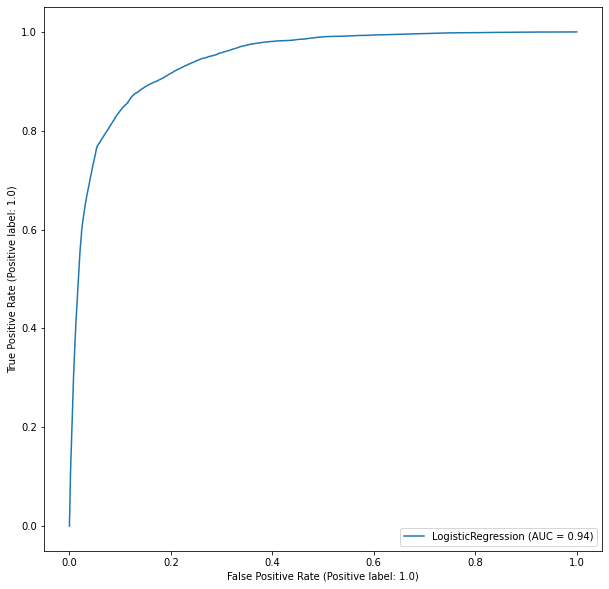

In [22]:
#ROC curve
from sklearn.metrics import RocCurveDisplay, auc, roc_auc_score
fig, ax = plt.subplots(figsize=(10, 10))
RocCurveDisplay.from_estimator(logReg, X_test, y_test, ax=ax)

In [23]:
#K folds cross validation
#from sklearn.model_selection import cross_val_score, GridSearchCV
#score = cross_val_score(logReg, X_train, y_train, cv=5)
#print('Cross-Validation Accuracy Scores', score)

In [24]:
feature_names = X.columns.tolist()
coefficients = logReg.coef_

for feature, coef in zip(feature_names, coefficients[0]):
    print(feature, ':', coef)

Age : 0.0038710368395002276
DemPartyCaucus20 : 0.09172692091885784
DemPartyCaucus18 : 0.1251194666892021
DemPartyCaucus16 : 0.32142831638651465
General20 : 0.23083401423380231
General18 : 1.3241843179714394
General16 : 0.4940073039089994
NovemberMunicipal21 : 1.0074909850685954
SpringMuniRunoff19 : 2.4218030756893802
SpringMuniRunoff15 : 0.46695170746336356
Sex_F : -0.9817943783173121
Sex_M : -0.9575961600457003
Party_D : -0.6310345832645992
Party_L : -0.18991891806515787
Party_R : -0.5000948573989326
Party_U : -0.6761140938305897


In [25]:
#generate prediction scores on X (df with spring2019 column dropped)
preds = logReg.predict_proba(X)

In [26]:
#add those predictions to a dataframe
preds_df = pd.DataFrame(preds)

In [27]:
#drop the index of the new dataframe
preds_df = preds_df.reset_index(drop=True)

In [28]:
preds_df = preds_df.rename(columns={1: 'model_score'})

In [29]:
preds_df.head()

,0,model_score
0,0.967431,0.032569
1,0.965853,0.034147
2,0.964718,0.035282
3,0.964718,0.035282
4,0.964850,0.035150


In [30]:
#read in all the voter data so that the scores are attached to vanid
cleaned_2019 = pd.read_csv('cleaned_voter_data.csv')

In [31]:
#resetting index
cleaned_2019 = cleaned_2019.reset_index(drop=True)

In [32]:
#combining model predictions with voter file data
full_data = pd.concat([preds_df, cleaned_2019 ], axis=1)

In [33]:
#at this point I have the model predictions combined with the voterdata from before the 2023 election

full_data.head()

,0,model_score,Voter File VANID,Age,DemPartyCaucus20,DemPartyCaucus18,DemPartyCaucus16,General20,General18,General16,NovemberMunicipal21,SpringMuniRunoff19,SpringMuniRunoff15,SpringMunicipal19,Sex_F,Sex_M,Party_D,Party_L,Party_R,Party_U
0,0.967431,0.032569,12128431,20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1
1,0.965853,0.034147,12131589,21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0
2,0.964718,0.035282,12133815,36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
3,0.964718,0.035282,12135026,36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
4,0.964850,0.035150,12136519,35,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0


In [34]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414056 entries, 0 to 414055
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   0                    414056 non-null  float64
 1   model_score          414056 non-null  float64
 2   Voter File VANID     414056 non-null  int64  
 3   Age                  414056 non-null  int64  
 4   DemPartyCaucus20     414056 non-null  float64
 5   DemPartyCaucus18     414056 non-null  float64
 6   DemPartyCaucus16     414056 non-null  float64
 7   General20            414056 non-null  float64
 8   General18            414056 non-null  float64
 9   General16            414056 non-null  float64
 10  NovemberMunicipal21  414056 non-null  float64
 11  SpringMuniRunoff19   414056 non-null  float64
 12  SpringMuniRunoff15   414056 non-null  float64
 13  SpringMunicipal19    414056 non-null  float64
 14  Sex_F                414056 non-null  int64  
 15  Sex_M            

In [35]:
#combining new denver data from after 2023 election into one dataframe
filenames_1 = ['d1.csv', 'd2.csv', 'd3.csv', 'd4.csv', 'd5.csv', 'd6.csv', 'd7.csv', 'd8.csv', 'd9.csv']
dataframes_1 = []
for file in filenames_1:
    df_new_denver_data  = pd.read_csv(file)
    dataframes_1.append(df_new_denver_data)

df_new_denver_data = pd.concat(dataframes_1)

C:\Users\Jonbi\AppData\Local\Temp\ipykernel_19120\1508744918.py:5: DtypeWarning: Columns (35,36,37,38,39,40,47,48,49,50,51,52,53,54,55,56,57,58,64,65,66,67,68,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,103,104,106,107,108,111,115,116,118,119,120,121,122,127,129,130,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  df_new_denver_data  = pd.read_csv(file)
C:\Users\Jonbi\AppData\Local\Temp\ipykernel_19120\1508744918.py:5: DtypeWarning: Columns (36,37,39,40,90,92,94,96,99,103,107,108,109,110,112,114,116,124,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df_new_denver_data  = pd.read_csv(file)
C:\Users\Jonbi\AppData\Local\Temp\ipykernel_19120\1508744918.py:5: DtypeWarning: Columns (32,35,36,37,38,39,40,46,47,48,49,50,51,52,53,54,55,56,57,58,63,64,65,66,67,68,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,103,104,106,107,108,110,111,112,114,115,116,119,120,121,122,127,129,130,131,132) have mixed 

In [36]:
#cleaning columns in new denver data
new_columns_clean = ['DemPartyCaucus20', 'DemPartyCaucus18', 'DemPartyCaucus16', 'DemPartyCaucus14', 'DemPartyCaucus12', 'DemPartyCaucus10', 'DemPartyCaucus08', 'DemPartyCaucus06', 'DemPartyCaucus04', 'General22', 'General20', 'General18', 'General16', 'General14', 'General12', 'General10', 'General08', 'General06', 'General04', 'General02', 'General01', 'General00', 'General99', 'General98', 'General97', 'General96', 'General95', 'NovemberMunicipal21', 'NovemberMunicipal19', 'NovemberMunicipal17', 'NovemberMunicipal15', 'NovemberMunicipal13', 'NovemberMunicipal11', 'NovemberMunicipal09', 'NovemberMunicipal07', 'NovemberMunicipal05', 'NovemberMunicipal03', 'PresidentialPrimary20', 'PresidentialPrimary20Party', 'Primary22', 'Primary22Party', 'Primary20', 'Primary20Party', 'Primary18', 'Primary18Party', 'Primary16', 'Primary16Party', 'Primary14', 'Primary14Party', 'Primary12', 'Primary12Party', 'Primary10', 'Primary10Party', 'Primary08', 'Primary08Party', 'Primary06', 'Primary04', 'Primary02', 'Primary01', 'Primary00', 'Primary99', 'Primary98', 'Primary97', 'Primary96', 'Primary95', 'Recall13', 'Runoff11', 'Special21', 'Special20', 'Special19', 'Special18', 'Special14', 'Special10', 'Special09', 'Special07', 'Special06', 'Special04', 'Special02', 'Special01', 'Special00', 'Special99', 'Special98', 'Special97', 'Special96', 'Special95', 'SpringMuniRunoff19', 'SpringMuniRunoff15', 'SpringMuniRunoff11', 'SpringMuniRunoff07', 'SpringMuniRunoff03', 'SpringMunicipal21', 'SpringMunicipal19', 'SpringMunicipal17', 'SpringMunicipal15', 'SpringMunicipal13', 'SpringMunicipal11', 'SpringMunicipal10', 'SpringMunicipal09', 'SpringMunicipal07', 'SpringMunicipal05', 'SpringMunicipal03', 'Primary08Party', 'Primary10Party', 'Primary12Party', 'Primary14Party', 'Primary18Party', 'Primary22Party']

In [37]:
#editing column so that 0 = no vote and 1 = vote
for column in new_columns_clean:
    df_new_denver_data[column] = df_new_denver_data[column].replace('A', 1)
    df_new_denver_data[column] = df_new_denver_data[column].replace('P', 1)
    df_new_denver_data[column] = df_new_denver_data[column].replace('E', 1)
    df_new_denver_data[column] = df_new_denver_data[column].replace('Y', 1)
    df_new_denver_data[column] = df_new_denver_data[column].replace('M', 1)
    df_new_denver_data[column] = df_new_denver_data[column].replace('Q', 1)
    df_new_denver_data[column] = df_new_denver_data[column].replace('V', 1)
    df_new_denver_data[column] = df_new_denver_data[column].replace('Y', 1)
    df_new_denver_data[column] = df_new_denver_data[column].replace('D', 1)
    df_new_denver_data[column] = df_new_denver_data[column].replace('R', 1)
    df_new_denver_data[column] = df_new_denver_data[column].replace('U', 1)
    df_new_denver_data[column].fillna(0, inplace=True)


In [38]:
df_new_denver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147704 entries, 0 to 17842
Columns: 133 entries, Voter File VANID to SpringMunicipal03
dtypes: float64(118), int64(3), object(12)
memory usage: 151.0+ MB


In [39]:
# First, create a temporary DataFrame from DataFrame_2 with only the 'ID' column
temp_df = df_new_denver_data[['Voter File VANID']].copy()

In [40]:
# Add a new column called 'Exists' and set its value to 1
temp_df['Exists'] = 1

In [41]:
# Merge DataFrame_1 with temp_df on the 'ID' column using a left join
merged_df = full_data.merge(temp_df, on='Voter File VANID', how='left')

In [42]:
merged_df = merged_df.rename(columns={'Exists': 'SpringMunicipal23'})

In [43]:
votes = merged_df.query('SpringMunicipal23 == 1').shape[0]
print(votes)

126030


In [44]:
#new merged_df contains a new "exists" column that contains a 1 if they voted in the spring election and a 0 if they didnt't vote
merged_df['SpringMunicipal23'].fillna(0, inplace=True)

In [45]:
#this should be the final dataframe needed to analyze the model's performance
merged_df.head()

,0,model_score,Voter File VANID,Age,DemPartyCaucus20,DemPartyCaucus18,DemPartyCaucus16,General20,General18,General16,...,SpringMuniRunoff19,SpringMuniRunoff15,SpringMunicipal19,Sex_F,Sex_M,Party_D,Party_L,Party_R,Party_U,SpringMunicipal23
0,0.967431,0.032569,12128431,20,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,1,1.0
1,0.965853,0.034147,12131589,21,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,1,1,0,0,0,0.0
2,0.964718,0.035282,12133815,36,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1,0,1,0,0,0,0.0
3,0.964718,0.035282,12135026,36,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1,0,1,0,0,0,0.0
4,0.964850,0.035150,12136519,35,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1,0,1,0,0,0,0.0


In [46]:
#changing percenatge to number score
merged_df['model_score'] = merged_df['model_score'].multiply(100)

In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414056 entries, 0 to 414055
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   0                    414056 non-null  float64
 1   model_score          414056 non-null  float64
 2   Voter File VANID     414056 non-null  int64  
 3   Age                  414056 non-null  int64  
 4   DemPartyCaucus20     414056 non-null  float64
 5   DemPartyCaucus18     414056 non-null  float64
 6   DemPartyCaucus16     414056 non-null  float64
 7   General20            414056 non-null  float64
 8   General18            414056 non-null  float64
 9   General16            414056 non-null  float64
 10  NovemberMunicipal21  414056 non-null  float64
 11  SpringMuniRunoff19   414056 non-null  float64
 12  SpringMuniRunoff15   414056 non-null  float64
 13  SpringMunicipal19    414056 non-null  float64
 14  Sex_F                414056 non-null  int64  
 15  Sex_M            

In [48]:
#function outputs classification scores based on actual model performance based on voting results

def classification_info(dataframe, column_name, threshold):
    voters_targeted = dataframe.query('`' + column_name + '` >= @threshold').shape[0]
    true_positives = dataframe.query('SpringMunicipal23 == 1 & `' + column_name + '` >= @threshold').shape[0]
    true_negatives = merged_df.query('SpringMunicipal23 == 0 & `' + column_name + '` < @threshold').shape[0]
    false_positives = merged_df.query('SpringMunicipal23 == 0 & `' + column_name + '` >= @threshold').shape[0]
    false_negatives = merged_df.query('SpringMunicipal23 == 1 & `' + column_name + '` < @threshold').shape[0]
    accuracy = ((true_positives + true_negatives)/414056)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    results_df = pd.DataFrame({'threshold_value': [threshold],
                               'voters_targeted': [voters_targeted],
                               'true_positives': [true_positives], 
                               'true_negatives': [true_negatives], 
                               'false_positives': [false_positives], 
                               'false_negatives': [false_negatives], 
                               'accuracy': [accuracy], 
                               'precision': [precision], 
                               'recall': [recall], 
                               'f1_score': [f1_score]})
    return results_df

In [52]:
#creatring different threshold values to examine model performancer at various levels
threshold_values = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [53]:
#looping through each threshold value and calculating classification scores for each one
loop_results_df = pd.DataFrame()
for threshold in threshold_values:
    temp_df = classification_info(merged_df, 'model_score', threshold)
    loop_results_df = pd.concat([loop_results_df, temp_df], axis=0)

In [54]:
loop_results_df.head(20)

,threshold_value,voters_targeted,true_positives,true_negatives,false_positives,false_negatives,accuracy,precision,recall,f1_score
0,20,164845,97785,220966,67060,28245,0.769826,0.593194,0.775887,0.672351
0,25,152048,95160,231138,56888,30870,0.788053,0.625855,0.755058,0.684412
0,30,144431,92256,235851,52175,33774,0.792422,0.638755,0.732016,0.682213
0,35,143040,91822,236808,51218,34208,0.793685,0.641932,0.728573,0.682514
0,40,126721,82770,244075,43951,43260,0.789374,0.653167,0.656748,0.654953
0,45,117433,77613,248206,39820,48417,0.786896,0.660913,0.615830,0.637575
0,50,114673,75901,249254,38772,50129,0.785292,0.661891,0.602245,0.630661
0,55,112583,74788,250231,37795,51242,0.784964,0.664292,0.593414,0.626856
0,60,110812,74206,251420,36606,51824,0.786430,0.669657,0.588796,0.626629
0,65,108261,73417,253182,34844,52613,0.788780,0.678148,0.582536,0.626716
